In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/celeb-fake/id0_id3_0009.mp4
/kaggle/input/celeb-fake/id0_id2_0008.mp4
/kaggle/input/celeb-fake/id0_id4_0003.mp4
/kaggle/input/celeb-fake/id0_id4_0004.mp4
/kaggle/input/celeb-fake/id0_id2_0009.mp4
/kaggle/input/celeb-fake/id0_id9_0007.mp4
/kaggle/input/celeb-fake/id0_id3_0005.mp4
/kaggle/input/celeb-fake/id0_id9_0000.mp4
/kaggle/input/celeb-fake/id0_id2_0004.mp4
/kaggle/input/celeb-fake/id0_id2_0007.mp4
/kaggle/input/celeb-fake/id0_id3_0001.mp4
/kaggle/input/celeb-fake/id0_id4_0000.mp4
/kaggle/input/celeb-fake/id0_id2_0000.mp4
/kaggle/input/celeb-fake/id0_id4_0002.mp4
/kaggle/input/celeb-fake/id0_id9_0006.mp4
/kaggle/input/celeb-fake/id0_id1_0002.mp4
/kaggle/input/celeb-fake/id0_id3_0007.mp4
/kaggle/input/celeb-fake/id0_id9_0002.mp4
/kaggle/input/celeb-fake/id0_id3_0003.mp4
/kaggle/input/celeb-fake/id0_id6_0007.mp4
/kaggle/input/celeb-fake/id0_id6_0009.mp4
/kaggle/input/celeb-fake/id0_id1_0000.mp4
/kaggle/input/celeb-fake/id0_id2_0006.mp4
/kaggle/input/celeb-fake/id0_id2_0

In [4]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 44.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 1.34.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<4.0.0dev,>=3.19.5, but you have protobuf 4.25.6 which is incompatible.
google-cloud-bigtable 2.27.0 requires google-api-core[grpc]<3.0.0dev,>=2.16.0, but you have google-api-core 1.34.1 which is incompatible.
pandas-gbq 0.25.0 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.
tensorflow-decision-forests 1.10.0 requires tens

In [34]:
import cv2 
import numpy as np 
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, TimeDistributed, GlobalAveragePooling2D, LSTM, Dense 
from tensorflow.keras.applications import ResNet50 
import time 
import mediapipe as mp
import datetime
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### Model

In [6]:
input_shape = (16, 224, 224, 3)

In [7]:
inputs = Input(shape=input_shape) 
base_model = ResNet50(
    weights='imagenet', 
    include_top=False, 
    input_shape=(224, 224, 3)) 
x = TimeDistributed(base_model)(inputs) 
x = TimeDistributed(GlobalAveragePooling2D())(x) 
x = LSTM(128)(x) 
x = Dense(128, activation='relu')(x) 
outputs = Dense(1, activation='sigmoid')(x)



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [9]:
loaded_model = Model(inputs, outputs) 
loaded_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
loaded_model.load_weights('/kaggle/input/liveness_classifier/tensorflow2/default/1/resnet_model.h5')

In [13]:
loaded_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 16, 224, 224, 3)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 16, 7, 7, 2048)      │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 16, 2048)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │       1,114,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,718,977 (94.30 MB)

 Trainable params: 24,665,857 (94.09 MB)

 Non-trainable params: 53,120 (207.50 KB)

### Preprocessing  

In [15]:
def extract_frames(video_path, interval=5, num_frames=16, target_size=(224, 224)):
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if frame_count % interval == 0:
            # 224x224 pixels
            frame_resized = cv2.resize(frame, target_size)
            frames.append(frame_resized)

            # Stops when it has16 frames
            if len(frames) == num_frames:
                break
        frame_count += 1

    cap.release()

    # It there is not 16 frames, copy the last frame
    while len(frames) < num_frames:
        frames.append(frames[-1] if frames else np.zeros((*target_size, 3), dtype=np.uint8))

    return np.array(frames) 


In [20]:
def predict_video_class(video_path, model):
    frames = extract_frames(video_path) / 255.0  
    frames = np.expand_dims(frames, axis=0) 

    prediction = model.predict(frames)[0][0]

    label = "Deepfake" if prediction > 0.5 else "Real"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    print(f"Vídeo: {video_path}")
    print(f"Predição: {label} (Confiança: {confidence:.4f})")

    return label, confidence

### Predict Fake

In [21]:
video_path = "kaggle/input/celeb-fake/id0_id3_0009.mp4"
predict_video_class(video_path, loaded_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 34s 34s/step
Vídeo: kaggle/input/celeb-fake/id0_id3_0009.mp4
Predição: Deepfake (Confiança: 0.8248)


('Deepfake', 0.82483137)

### Predict Real

In [26]:
video_path = "/kaggle/input/celebe-real/id3_0001.mp4"
predict_video_class(video_path, loaded_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Vídeo: /kaggle/input/celebe-real/id3_0001.mp4
Predição: Deepfake (Confiança: 0.8248)


('Deepfake', 0.82475215)

In [31]:
def evaluate_videos(video_dir):
    initial_time = datetime.datetime.now()
    print(f"Start at {initial_time.strftime('%d-%m-%Y %H:%M:%S')}")
    
    true_labels = []
    pred_labels = []

    for class_label in  ["Real", "Deepfake"]:

        class_label_dir = ""
        if class_label == "Real":
            class_label_dir = "celebe-real"
        else:
            class_label_dir = "celeb-fake"
            
        class_dir = os.path.join(video_dir, class_label_dir)
        print(class_dir)

        if not os.path.exists(class_dir):
            continue


        video_files = sorted([f for f in os.listdir(class_dir) if f.endswith(".mp4")])

        for video_file in video_files:
            if video_file.endswith(".mp4"):
                video_path = os.path.join(class_dir, video_file)
                print(f"\nProcessando: {video_file} ({class_label})")

                # Extração de frames e detecção de deepfake
                frames = extract_frames(video_path)

                label, confidence = predict_video_class(video_path, loaded_model)
                pred_label = label

                # Salvar rótulos reais e preditos
                true_labels.append(class_label)
                pred_labels.append(pred_label)

    # Gerar matriz de confusão
    cm = confusion_matrix(true_labels, pred_labels, labels=["Real", "Deepfake"])
    df_cm = pd.DataFrame(cm, index=["Real", "Deepfake"], columns=["Predito Real", "Predito Deepfake"])

    # Exibir matriz de confusão
    plt.figure(figsize=(6, 5))
    sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
    plt.xlabel("Predição")
    plt.ylabel("Real")
    plt.title("Matriz de Confusão - Detecção de Deepfake")
    plt.show()

    # Exibir relatório de classificação
    print("\nRelatório de Classificação:")
    print(classification_report(true_labels, pred_labels, target_names=["Real", "Deepfake"]))

    final_time = datetime.datetime.now()
    duration = final_time - initial_time
    print(f"Finish at {final_time.strftime('%d-%m-%Y %H:%M:%S')}, duration: {duration}")

Start at 12-03-2025 21:36:42
/kaggle/input/celebe-real

Processando: id0_0000.mp4 (Real)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Vídeo: /kaggle/input/celebe-real/id0_0000.mp4
Predição: Deepfake (Confiança: 0.6865)

Processando: id0_0001.mp4 (Real)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Vídeo: /kaggle/input/celebe-real/id0_0001.mp4
Predição: Deepfake (Confiança: 0.8248)

Processando: id0_0002.mp4 (Real)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Vídeo: /kaggle/input/celebe-real/id0_0002.mp4
Predição: Deepfake (Confiança: 0.5509)

Processando: id0_0003.mp4 (Real)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Vídeo: /kaggle/input/celebe-real/id0_0003.mp4
Predição: Deepfake (Confiança: 0.8248)

Processando: id0_0004.mp4 (Real)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Vídeo: /kaggle/input/celebe-real/id0_0004.mp4
Predição: Deepfake (Confiança: 0.8248)

Processando: id0_0005.mp4 (Real)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Vídeo: /kaggle/input/celebe-real/id0_0005.mp4
Predição: Deepfake (Confiança: 0.7326)

Processando: i

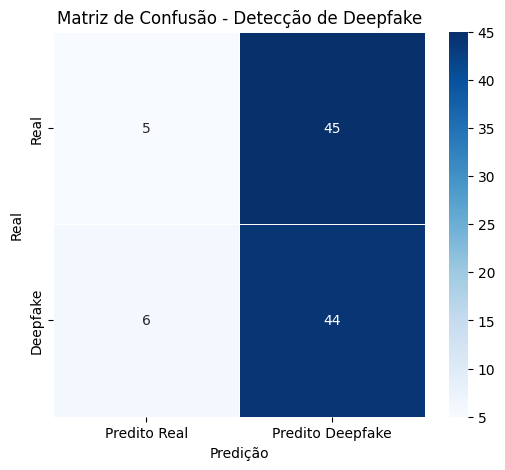


Relatório de Classificação:
              precision    recall  f1-score   support

        Real       0.49      0.88      0.63        50
    Deepfake       0.45      0.10      0.16        50

    accuracy                           0.49       100
   macro avg       0.47      0.49      0.40       100
weighted avg       0.47      0.49      0.40       100

Finish at 12-03-2025 21:39:12, duration: 0:02:29.406798


In [35]:
## Diretório de vídeos de teste
video_test_dir = "/kaggle/input/"

# Avaliação de todos os vídeos no diretório
evaluate_videos(video_test_dir)